# 調整色調、色溫(白平衡)

白平衡：
让实际环境中白色的物体在你拍摄的画面中也呈现出“真正”的白色。不同性质的光源会在画面中产生不同的色彩倾向，比如说，蜡烛的光线会使画面偏橘黄色，而黄昏过后的光线则会为景物披上一层蓝色的冷调。而我们的视觉系统会自动对不同的光线作出补偿，所以无论在暖调还是冷调的光线环境下，我们看一张白纸永远还是白色的。但相机则不然，它只会直接记录呈现在它面前的色彩，这就会导致画面色彩偏暖或偏冷。

破坏白平衡：
使图像偏暖或者偏冷。

思路：
白平衡的思想是将三原色的成分比例变得近似相同，而破坏白平衡则相反，增大b分量所占比例实现冷色调，增大r分量所占比例实现暖色调。

引用自：https://blog.csdn.net/weixin_39853245/article/details/101199768

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
from IPython.display import clear_output

In [2]:
def show_img(img):
#     plt.figure(figsize=(15,15)) 
    image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.show()

In [3]:
def modify_color_temperature(img):
    
    # ---------------- 冷色調 ---------------- #  
    
#     height = img.shape[0]
#     width = img.shape[1]
#     dst = np.zeros(img.shape, img.dtype)

    # 1.計算三個通道的平均值，並依照平均值調整色調
    imgB = img[:, :, 0] 
    imgG = img[:, :, 1]
    imgR = img[:, :, 2] 

    # 調整色調請調整這邊~~ 
    # 白平衡 -> 三個值變化相同
    # 冷色調(增加b分量) -> 除了b之外都增加
    # 暖色調(增加r分量) -> 除了r之外都增加
    bAve = cv2.mean(imgB)[0] 
    gAve = cv2.mean(imgG)[0] + 20
    rAve = cv2.mean(imgR)[0] + 20
    aveGray = (int)(bAve + gAve + rAve) / 3

    # 2. 計算各通道增益係數，並使用此係數計算結果
    bCoef = aveGray / bAve
    gCoef = aveGray / gAve
    rCoef = aveGray / rAve
    imgB = np.floor((imgB * bCoef))  # 向下取整
    imgG = np.floor((imgG * gCoef))
    imgR = np.floor((imgR * rCoef))

    # 3. 變換後處理
#     for i in range(0, height):
#         for j in range(0, width):
#             imgb = imgB[i, j]
#             imgg = imgG[i, j]
#             imgr = imgR[i, j]
#             if imgb > 255:
#                 imgb = 255
#             if imgg > 255:
#                 imgg = 255
#             if imgr > 255:
#                 imgr = 255
#             dst[i, j] = (imgb, imgg, imgr)

    # 將原文第3部分的演算法做修改版，加快速度
    imgb = imgB
    imgb[imgb > 255] = 255
    
    imgg = imgG
    imgg[imgg > 255] = 255
    
    imgr = imgR
    imgr[imgr > 255] = 255
        
    cold_rgb = np.dstack((imgb, imgg, imgr)).astype(np.uint8) 
            
#     print("Cold color:")
#     print(cold_rgb.shape)
#     show_img(cold_rgb)



    # ---------------- 暖色調 ---------------- #  
    
     # 1.計算三個通道的平均值，並依照平均值調整色調
    imgB = img[:, :, 0] 
    imgG = img[:, :, 1]
    imgR = img[:, :, 2] 

    # 調整色調請調整這邊~~ 
    # 白平衡 -> 三個值變化相同
    # 冷色調(增加b分量) -> 除了b之外都增加
    # 暖色調(增加r分量) -> 除了r之外都增加
    bAve = cv2.mean(imgB)[0] + 20
    gAve = cv2.mean(imgG)[0] + 20
    rAve = cv2.mean(imgR)[0] 
    aveGray = (int)(bAve + gAve + rAve) / 3

    # 2. 計算各通道增益係數，並使用此係數計算結果
    bCoef = aveGray / bAve
    gCoef = aveGray / gAve
    rCoef = aveGray / rAve
    imgB = np.floor((imgB * bCoef))  # 向下取整
    imgG = np.floor((imgG * gCoef))
    imgR = np.floor((imgR * rCoef))

    # 3. 變換後處理
#     for i in range(0, height):
#         for j in range(0, width):
#             imgb = imgB[i, j]
#             imgg = imgG[i, j]
#             imgr = imgR[i, j]
#             if imgb > 255:
#                 imgb = 255
#             if imgg > 255:
#                 imgg = 255
#             if imgr > 255:
#                 imgr = 255
#             dst[i, j] = (imgb, imgg, imgr)

    # 將原文第3部分的演算法做修改版，加快速度
    imgb = imgB
    imgb[imgb > 255] = 255
    
    imgg = imgG
    imgg[imgg > 255] = 255
    
    imgr = imgR
    imgr[imgr > 255] = 255
        
    warm_rgb = np.dstack((imgb, imgg, imgr)).astype(np.uint8) 


#     print("Warm color:")
#     print(warm_rgb.shape)
#     show_img(warm_rgb)


    
    # ---------------- 印出結果圖表 ---------------- #  
    
    plt.figure(figsize=(15,15)) 
    plt.subplot(1, 3, 1)                 
    increase_img = cv2.cvtColor(cold_rgb, cv2.COLOR_BGR2RGB)
    plt.imshow(increase_img)
    plt.title("Cold color", {'fontsize':20})  

    plt.subplot(1, 3, 2)
    decrease_img = cv2.cvtColor(origin_img, cv2.COLOR_BGR2RGB)
    plt.imshow(decrease_img)
    plt.title("Origin picture", {'fontsize':20})
    
    plt.subplot(1, 3, 3)
    decrease_img = cv2.cvtColor(warm_rgb, cv2.COLOR_BGR2RGB)
    plt.imshow(decrease_img)
    plt.title("Warm color", {'fontsize':20})
    
    plt.show()


In [4]:
def img_processing(img):
    # do something here
    modify_color_temperature(img)


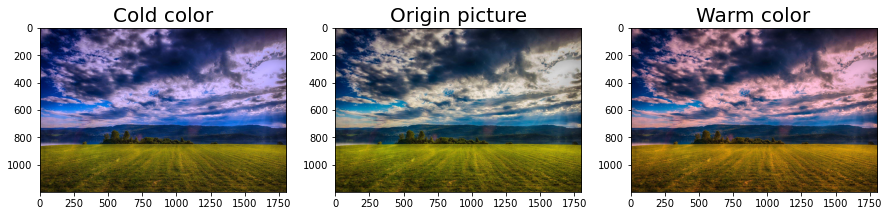

In [5]:
file_name = "./testdata/scenery.jpg"
origin_img = cv2.imread(file_name)
# print("origin picture:")
# show_img(origin_img)

result_img = img_processing(origin_img)
# show_img(result_img)

# Reference

https://blog.csdn.net/weixin_39853245/article/details/101199768

https://blog.csdn.net/qq_36187544/article/details/97657927?utm_medium=distribute.pc_relevant.none-task-blog-BlogCommendFromMachineLearnPai2-1.channel_param&depth_1-utm_source=distribute.pc_relevant.none-task-blog-BlogCommendFromMachineLearnPai2-1.channel_param

https://blog.csdn.net/wzwxiaozheng/article/details/38434391?utm_medium=distribute.pc_relevant.none-task-blog-BlogCommendFromMachineLearnPai2-2.channel_param&depth_1-utm_source=distribute.pc_relevant.none-task-blog-BlogCommendFromMachineLearnPai2-2.channel_param

https://medium.com/%E9%9D%92%E8%98%8B%E6%9E%9C3c/%E6%94%9D%E5%BD%B1%E5%9F%BA%E7%A4%8E%E8%A8%93%E7%B7%B4-%E7%99%BD%E5%B9%B3%E8%A1%A1%E6%98%AF%E4%BB%80%E9%BA%BC-%E8%89%B2%E6%BA%AB%E8%A9%B2%E6%80%8E%E9%BA%BC%E8%AA%BF%E6%95%B4-efd8eed4df2b

https://kknews.cc/zh-tw/photography/9p425vl.html
